# 1. Data 설명과 분석 목표, 반드시 들어가야 하는 내용

## Data Description
- Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임을 제작한 회사입니다.
- NA_Sales : 북미지역에서의 출고량입니다.
- EU_Sales : 유럽지역에서의 출고량입니다.
- JP_Sales : 일본지역에서의 출고량입니다.
- Other_Sales : 기타지역에서의 출고량입니다.


## Goal of project
- 다음 분기에 어떤 게임을 설계해야 할까를 정하는 과정과 그 결과를 보여주는 것이 목표

## 반드시 들어가야 하는 내용
- 1. 지역에 따라서 선호하는 게임 장르가 다를까?
- 2. 연도별 게임의 트랜드가 있을까?
- 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

# 2. 데이터 불러오기

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import chi2_contingency
import scipy.stats as stats
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [40]:
vgames = pd.read_csv('/Users/hanhyeongu/Desktop/codestates/project/Section1 /vgames2.csv',index_col=0)
vgames

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


# 3. EDA

In [41]:
print('feature별 결측치 개수: \n',vgames.isna().sum(),'\n')

vgames.dropna(axis=0,inplace=True)

print('결측치 제거 후 확인: \n',vgames.isna().sum(),'\n')
vgames.reset_index(drop=True, inplace=True)


feature별 결측치 개수: 
 Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64 

결측치 제거 후 확인: 
 Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64 



In [42]:
# feature들의 데이터 타입 확인
vgames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [43]:
warnings.filterwarnings('ignore')

feature = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
unit = ['K','M']

for i in feature:
    for j in unit:
        list = vgames[ vgames[i].str.contains(j, na=False)].index.to_list()

        if j == 'K':
            for z in list:
                vgames[i][z] = float(vgames[i][z].strip(j))*1000/1000000
                list= []
        elif j == 'M':
            for z in list:
                vgames[i][z] = float(vgames[i][z].strip(j))
                list = []

In [44]:
## 'NA_Sales'에서부터 'Other_Sales'까지 전체 형 변환
vgames.loc[:, 'NA_Sales':'Other_Sales'] = vgames.loc[:, 'NA_Sales':'Other_Sales'].astype('float')
vgames.Year = vgames.Year.astype(int)

In [45]:
vgames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


In [46]:
year_change = []
vgames2 = vgames.copy()
for i in range(len(vgames2)):
    vgames2.Year = vgames2.Year.astype(str)
    if len(vgames2.Year[i]) < 4:
       year_change.append(i)
len(year_change)
## 년도에서 2018, 2020 처럼 표기된 것이 아닌 년도 개수를 찾아봄
## 총 100개가 잘못 표기됨. 전체 데이터 수가 1만개가 넘기 때문에 잘못 표기된 년도 행은 삭제 진행

100

In [47]:
vgames = vgames.drop(year_change, axis=0)
vgames.reset_index(drop=True, inplace=True)

# 4.  Genre에 대해서 

- 지역에 따라서 선호하는 게임의 장르에 대해서 

In [48]:
# 원본 "vgames"의 데이터 프레임은 그래도 놔둬보자!
df = vgames.copy()
df['Total_Sales'] = df.NA_Sales + df.EU_Sales + df.JP_Sales + df.Other_Sales

In [49]:
df.loc[:, 'NA_Sales':'Total_Sales'] = df.loc[:, 'NA_Sales':'Total_Sales'].round(3)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16136,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16137,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16138,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16139,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [50]:
CountryGenre = df.groupby('Genre')['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales'].sum()
CountryGenre.sort_values('Total_Sales', ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,855.96,512.52,155.73,183.64,1707.85
Sports,664.33,369.69,134.58,131.73,1300.33
Shooter,570.89,307.26,37.34,100.82,1016.31
Role-Playing,307.08,176.31,336.25,54.71,874.35
Platform,442.46,199.40,129.22,51.15,822.23
Misc,394.29,207.68,103.71,72.54,778.22
Racing,353.57,234.20,55.42,76.23,719.42
Fighting,220.11,99.72,86.39,36.10,442.32
Simulation,181.04,112.68,63.46,31.24,388.42


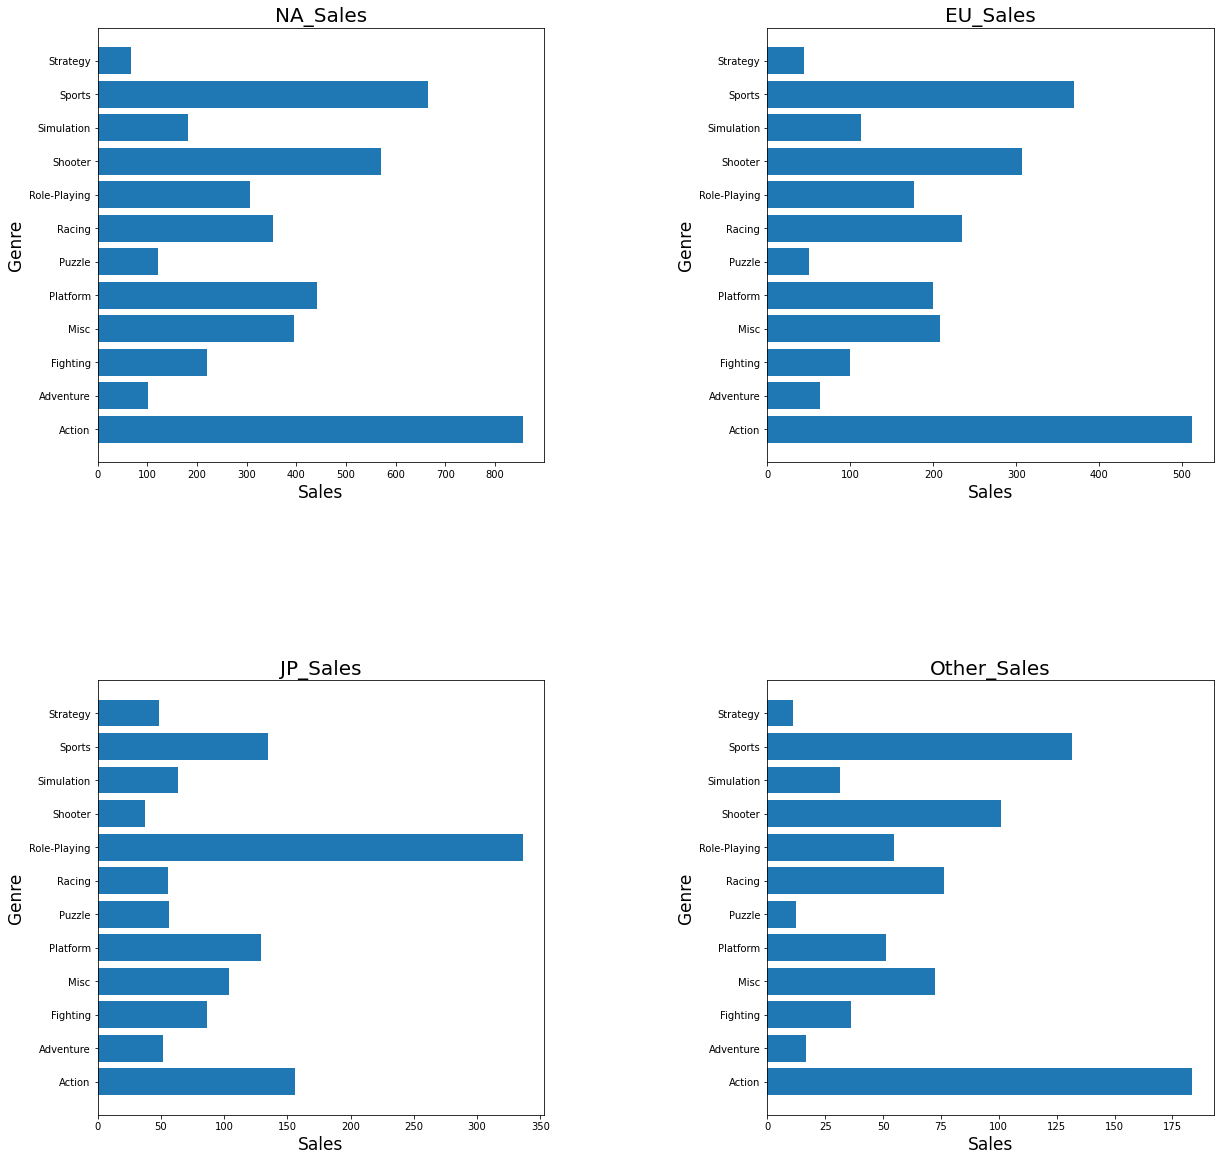

In [51]:
fig = plt.figure(figsize=(20,20))
ax = fig.subplots(2,2)
plt.subplots_adjust(wspace=0.5, hspace=0.5)



ax[0,0].set_title('NA_Sales', fontsize=20)
ax[0,0].set_xlabel('Sales', fontsize=17)
ax[0,0].set_ylabel('Genre', fontsize=17)
ax[0,0].barh(CountryGenre.index, CountryGenre.NA_Sales)

ax[0,1].set_title('EU_Sales', fontsize=20)
ax[0,1].set_xlabel('Sales', fontsize=17)
ax[0,1].set_ylabel('Genre', fontsize=17)
ax[0,1].barh(CountryGenre.index, CountryGenre.EU_Sales)

ax[1,0].set_title('JP_Sales', fontsize=20)
ax[1,0].set_xlabel('Sales', fontsize=17)
ax[1,0].set_ylabel('Genre', fontsize=17)
ax[1,0].barh(CountryGenre.index, CountryGenre.JP_Sales)

ax[1,1].set_title('Other_Sales', fontsize=20)
ax[1,1].set_xlabel('Sales', fontsize=17)
ax[1,1].set_ylabel('Genre', fontsize=17)
ax[1,1].barh(CountryGenre.index, CountryGenre.Other_Sales)


plt.show()

- 연도별 게임의 트렌드(장르)에 대해서

In [52]:
GenreYear = pd.crosstab(index=df.Year, columns=df.Genre)
GenreYear.sort_values('Year',ascending=True)


Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,1,0,1,4,0,0,0,0,2,0,0,0
1981,25,0,0,0,3,2,1,0,10,1,4,0
1982,18,0,0,1,5,3,2,0,5,0,2,0
1983,7,1,0,1,5,1,0,0,1,0,1,0
1984,1,0,0,1,1,3,3,0,3,0,2,0
1985,2,0,1,0,4,4,0,0,1,1,1,0
1986,6,0,0,0,5,0,1,1,4,0,3,0
1987,2,1,2,0,2,0,0,3,2,0,4,0
1988,2,0,0,0,4,1,1,3,1,1,2,0


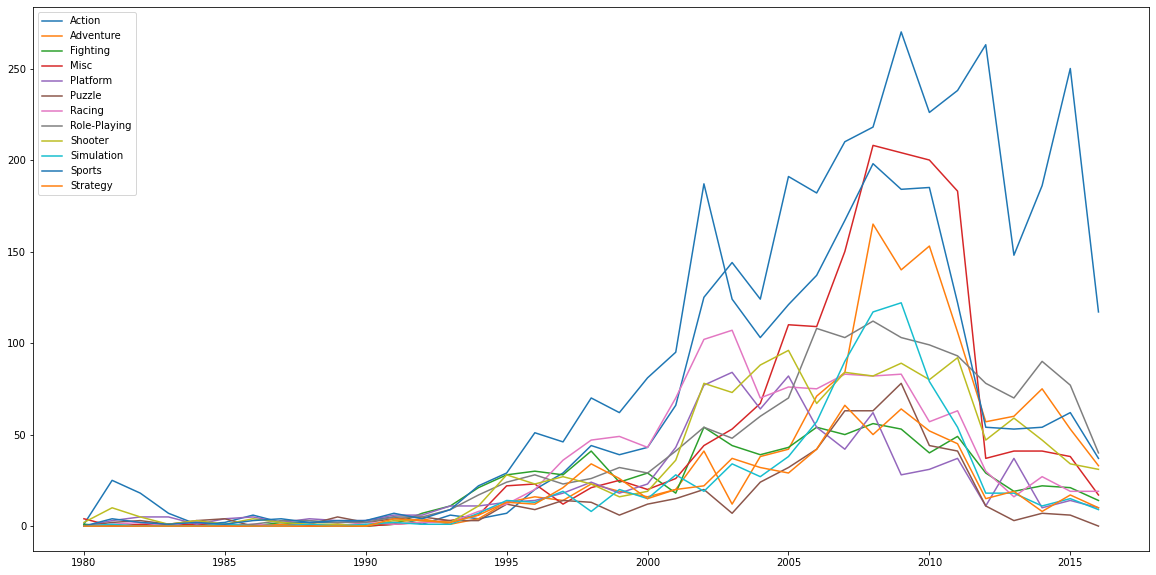

In [53]:
X = GenreYear.index[0:37]

plt.figure(figsize=(20,10))
for i in GenreYear.columns:
    plt.plot(X, GenreYear[i][0:37], label=i)
plt.legend()
plt.show()

# 5. Platform에 대해서

- 플랫폼에 따른 지역별 출고량에 대해서

In [54]:
df2 = vgames.copy()
df2['Total_Sales'] = df2.NA_Sales + df2.EU_Sales + df2.JP_Sales + df2.Other_Sales
df2.loc[:, 'NA_Sales':'Total_Sales'] = df2.loc[:, 'NA_Sales':'Total_Sales'].round(3)

In [55]:
CountryPlatform = df2.groupby('Platform')['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales'].sum()

#feature = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']
for i in feature:
    print(i,':',CountryPlatform[i].idxmax(), '\n')

NA_Sales : X360 

EU_Sales : PS3 

JP_Sales : DS 

Other_Sales : PS2 



In [56]:
CountryPlatform.sort_values('Total_Sales', ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Platform,,,,,
PS2,562.99,328.80,133.79,186.74,1212.32
X360,587.58,274.40,12.14,83.59,957.71
PS3,387.37,339.40,78.12,140.36,945.25
Wii,494.60,260.55,65.74,78.41,899.30
DS,381.37,190.59,168.73,59.33,800.02
PS,333.10,211.29,138.67,40.42,723.48
GBA,178.14,72.38,46.51,7.51,304.54
PSP,104.68,66.59,74.85,41.04,287.16
PS4,93.04,120.29,13.85,41.97,269.15


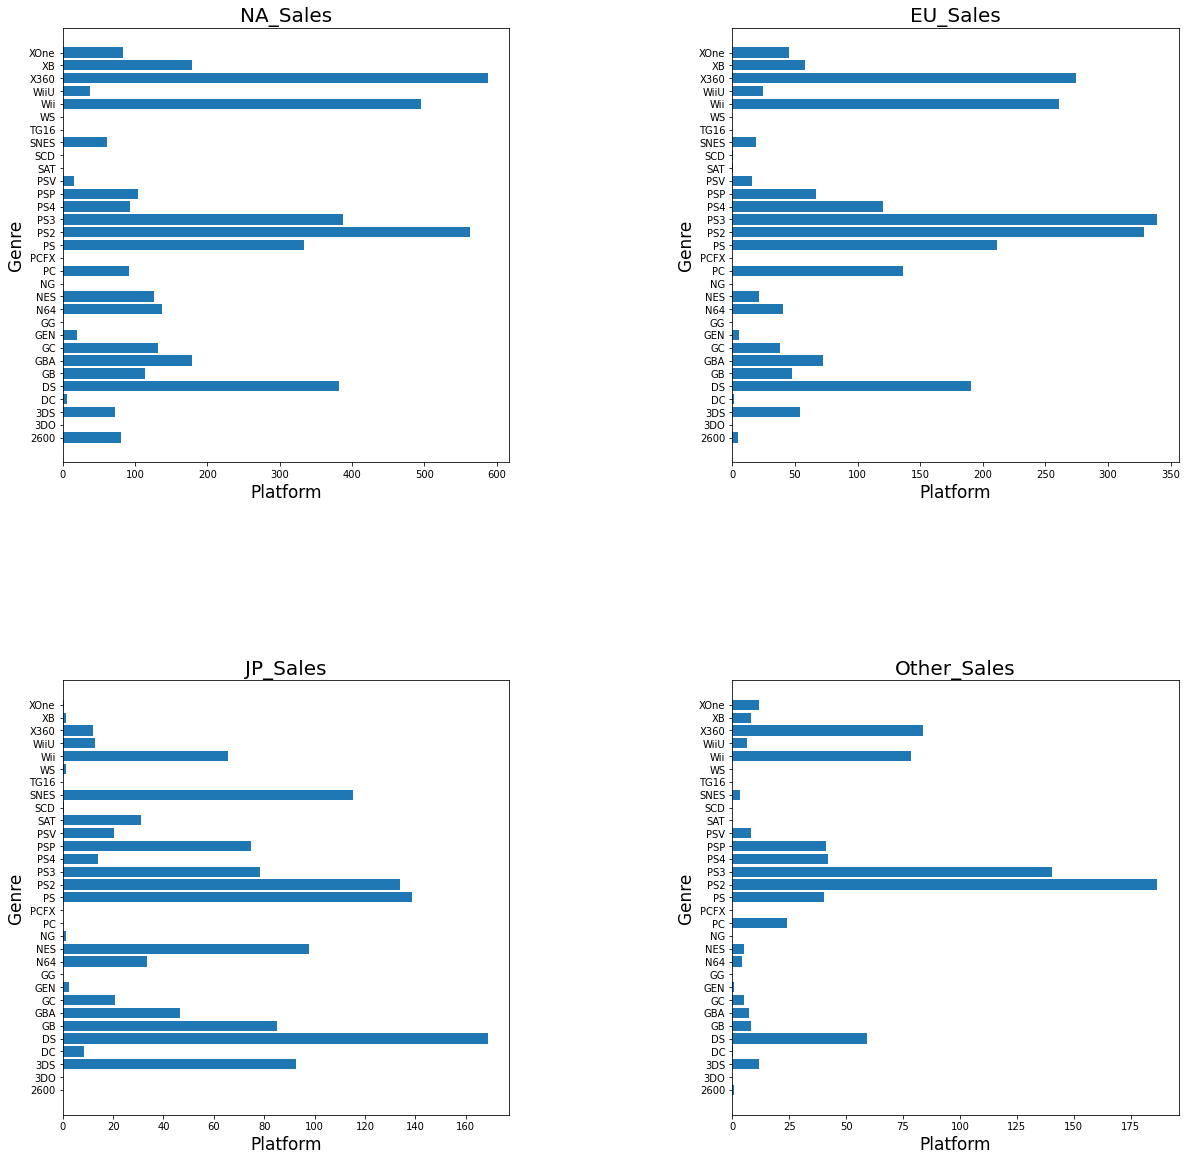

In [57]:
fig = plt.figure(figsize=(20,20))
ax = fig.subplots(2,2)
plt.subplots_adjust(wspace=0.5, hspace=0.5)



ax[0,0].set_title('NA_Sales', fontsize=20)
ax[0,0].set_xlabel('Platform', fontsize=17)
ax[0,0].set_ylabel('Genre', fontsize=17)
ax[0,0].barh(CountryPlatform.index, CountryPlatform.NA_Sales)

ax[0,1].set_title('EU_Sales', fontsize=20)
ax[0,1].set_xlabel('Platform', fontsize=17)
ax[0,1].set_ylabel('Genre', fontsize=17)
ax[0,1].barh(CountryPlatform.index, CountryPlatform.EU_Sales)

ax[1,0].set_title('JP_Sales', fontsize=20)
ax[1,0].set_xlabel('Platform', fontsize=17)
ax[1,0].set_ylabel('Genre', fontsize=17)
ax[1,0].barh(CountryPlatform.index, CountryPlatform.JP_Sales)

ax[1,1].set_title('Other_Sales', fontsize=20)
ax[1,1].set_xlabel('Platform', fontsize=17)
ax[1,1].set_ylabel('Genre', fontsize=17)
ax[1,1].barh(CountryPlatform.index, CountryPlatform.Other_Sales)


plt.show()

- 연도별 플랫폼의 변화에 대해서

In [58]:
PlatformYear = pd.crosstab(index=df2.Year, columns=df2.Platform)
PlatformYear.sort_values('Year',ascending=True,inplace=True)
T_PlatformYear = PlatformYear.T
T_PlatformYear.sort_values(by=[2016, 2015, 2014], ascending=False)


Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Platform,,,,,,,,,,,,,,,,,,,,,
PS4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,16,74,136,105,1,0
PSV,0,0,0,0,0,0,0,0,0,0,...,0,0,18,52,63,102,110,57,2,0
XOne,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,19,61,78,54,0,0
PC,0,0,0,0,0,1,0,0,1,0,...,107,86,137,61,38,44,50,38,0,0
3DS,0,0,0,0,0,0,0,0,0,0,...,0,0,115,93,89,78,85,34,0,0
PS3,0,0,0,0,0,0,0,0,0,0,...,158,181,214,147,127,107,72,31,0,0
WiiU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,32,42,31,28,10,0,0
X360,0,0,0,0,0,0,0,0,0,0,...,172,182,202,106,75,64,40,8,0,0
Wii,0,0,0,0,0,0,0,0,0,0,...,323,252,143,31,12,6,4,0,0,0


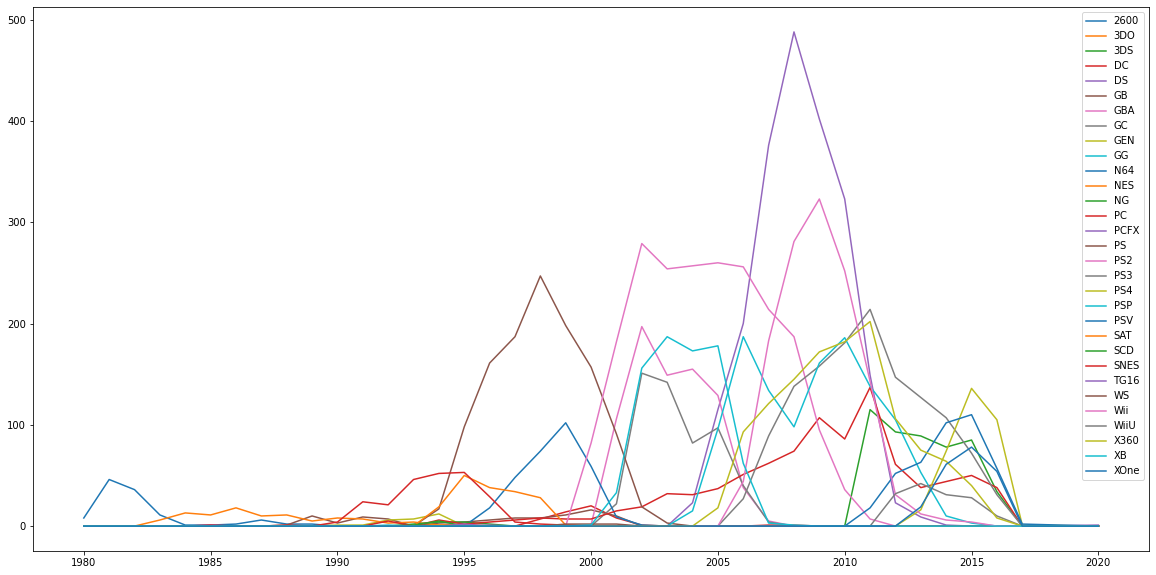

In [59]:
X2 = PlatformYear.index


plt.figure(figsize=(20,10))
for i in PlatformYear.columns:
    plt.plot(X2, PlatformYear[i], label=i)
plt.legend()
plt.show()

# 6. Genre와 Platform에 대해서

In [60]:
df3 = vgames.copy()
df3['Total_Sales'] = df3.NA_Sales + df3.EU_Sales + df3.JP_Sales + df3.Other_Sales
df3.loc[:, 'NA_Sales':'Total_Sales'] = df3.loc[:, 'NA_Sales':'Total_Sales'].round(3)

In [61]:

obs = pd.crosstab(index=df3.Genre, columns=df3.Platform)
chires = chi2_contingency(obs, correction=False)
print('Chi saure: {}' .format(chires[0]))
print('P-value: {}' .format(chires[1]))

Chi saure: 5772.691201706838
P-value: 0.0


# 7. 추가 분석

### 1. Numerical feature들의 평균 비교 (T-test)

 - feature들의 정규성 검정

In [62]:
df4 = vgames.copy()

In [63]:
test_stat, p_val = stats.shapiro(df4.NA_Sales)
print("Test-statistics: {}, p-value: {}" .format(test_stat, p_val))

test_stat, p_val = stats.shapiro(df4.EU_Sales)
print("Test-statistics: {}, p-value: {}" .format(test_stat, p_val))

test_stat, p_val = stats.shapiro(df4.JP_Sales)
print("Test-statistics: {}, p-value: {}" .format(test_stat, p_val))

test_stat, p_val = stats.shapiro(df4.Other_Sales)
print("Test-statistics: {}, p-value: {}" .format(test_stat, p_val))


Test-statistics: 0.26519811153411865, p-value: 0.0
Test-statistics: 0.2551206946372986, p-value: 0.0
Test-statistics: 0.24740254878997803, p-value: 0.0
Test-statistics: 0.2016705870628357, p-value: 0.0


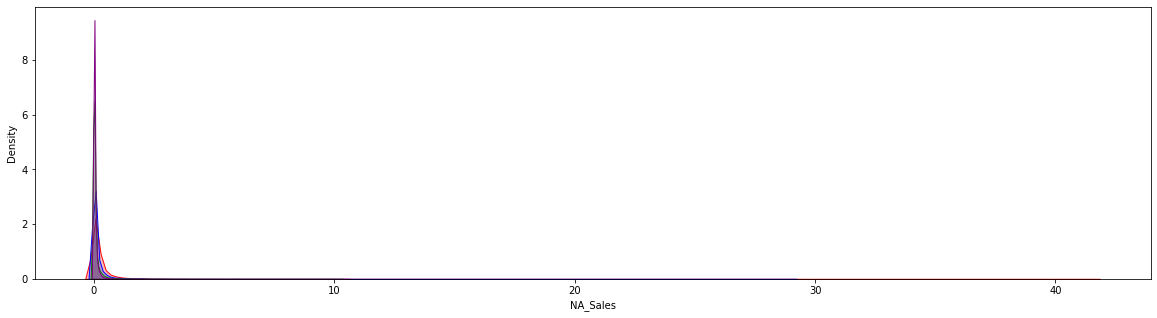

In [64]:
plt.figure(figsize=(20,5))

sns.kdeplot(data=df4.NA_Sales, color='red', shade=True)
sns.kdeplot(data=df4.EU_Sales, color='blue', shade=True)
sns.kdeplot(data=df4.JP_Sales, color='green', shade=True)
sns.kdeplot(data=df4.Other_Sales, color='purple', shade=True)
plt.show()

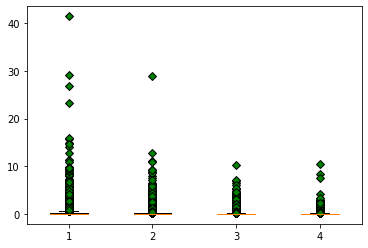

In [65]:
data = [df4.NA_Sales, df4.EU_Sales, df4.JP_Sales, df4.Other_Sales]
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(data, flierprops=green_diamond)
plt.show()

- 이상치 제거

In [66]:
def outliers_iqr(data):
    q1, q3 = np.percentile(data, [25,75])

    iqr = q3 - q1
    lower_bound = q1 - (iqr*1.5)
    upper_bound = q3 + (iqr*1.5)

    return np.where((data > upper_bound) | (data < lower_bound))

NA_outlier_index = outliers_iqr(df4.NA_Sales)[0]
EU_outlier_index = outliers_iqr(df4.EU_Sales)[0]
JP_outlier_index = outliers_iqr(df4.JP_Sales)[0]
Other_outlier_index = outliers_iqr(df4.Other_Sales)[0]

In [67]:
lead_outlier_index = np.concatenate((NA_outlier_index, EU_outlier_index, JP_outlier_index, Other_outlier_index),axis=None)

lead_not_outlier_index = []
for i in df4.index:
    if i not in lead_outlier_index:
        lead_not_outlier_index.append(i)

In [68]:
df4_clean = df4.loc[lead_not_outlier_index]
df4_clean = df4_clean.reset_index(drop=True)
df4_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
11653,MindJack,PS3,2011,Shooter,Square Enix,0.07,0.08,0.00,0.03
11654,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0.00,0.00,0.05,0.00
11655,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0.00,0.00,0.02,0.00
11656,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01


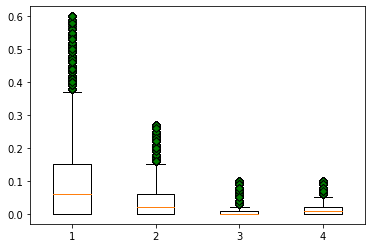

In [69]:
data = [df4_clean.NA_Sales, df4_clean.EU_Sales, df4_clean.JP_Sales, df4_clean.Other_Sales]
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(data, flierprops=green_diamond)
plt.show()

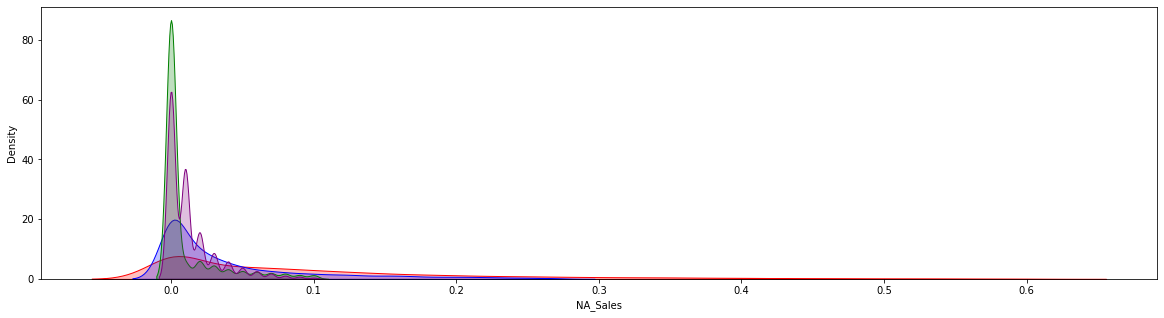

In [70]:
plt.figure(figsize=(20,5))

sns.kdeplot(data=df4_clean.NA_Sales, color='red', shade=True)
sns.kdeplot(data=df4_clean.EU_Sales, color='blue', shade=True)
sns.kdeplot(data=df4_clean.JP_Sales, color='green', shade=True)
sns.kdeplot(data=df4_clean.Other_Sales, color='purple', shade=True)
plt.show()

- 이상치 제거와 정규화 후 다시한번 정규성 검정

In [71]:
to_scale = df4_clean.loc[:, 'NA_Sales':'Other_Sales']
MinMax_scale = MinMaxScaler()
df4_MinMaxscaled = pd.DataFrame(MinMax_scale.fit_transform(to_scale), columns=to_scale.columns)

test_stat, p_val = stats.shapiro(df4_MinMaxscaled.NA_Sales)
print("Test-statistics: {}, p-value: {}" .format(test_stat, p_val))

test_stat, p_val = stats.shapiro(df4_MinMaxscaled.EU_Sales)
print("Test-statistics: {}, p-value: {}" .format(test_stat, p_val))

test_stat, p_val = stats.shapiro(df4_MinMaxscaled.JP_Sales)
print("Test-statistics: {}, p-value: {}" .format(test_stat, p_val))

test_stat, p_val = stats.shapiro(df4_MinMaxscaled.Other_Sales)
print("Test-statistics: {}, p-value: {}" .format(test_stat, p_val))



Test-statistics: 0.8041762113571167, p-value: 0.0
Test-statistics: 0.7313324809074402, p-value: 0.0
Test-statistics: 0.5410922169685364, p-value: 0.0
Test-statistics: 0.724198579788208, p-value: 0.0


In [72]:
Standard_scale = StandardScaler()
df4_Standardscaled = pd.DataFrame(Standard_scale.fit_transform(to_scale), columns=to_scale.columns)

test_stat, p_val = stats.shapiro(df4_Standardscaled.NA_Sales)
print("Test-statistics: {}, p-value: {}" .format(test_stat, p_val))

test_stat, p_val = stats.shapiro(df4_Standardscaled.EU_Sales)
print("Test-statistics: {}, p-value: {}" .format(test_stat, p_val))

test_stat, p_val = stats.shapiro(df4_Standardscaled.JP_Sales)
print("Test-statistics: {}, p-value: {}" .format(test_stat, p_val))

test_stat, p_val = stats.shapiro(df4_Standardscaled.Other_Sales)
print("Test-statistics: {}, p-value: {}" .format(test_stat, p_val))


Test-statistics: 0.8041778802871704, p-value: 0.0
Test-statistics: 0.7313441634178162, p-value: 0.0
Test-statistics: 0.5410941243171692, p-value: 0.0
Test-statistics: 0.7241969108581543, p-value: 0.0


In [73]:
Robust_scale = RobustScaler()
df4_Robustscaled = pd.DataFrame(Robust_scale.fit_transform(to_scale), columns=to_scale.columns)

test_stat, p_val = stats.shapiro(df4_Robustscaled.NA_Sales)
print("Test-statistics: {}, p-value: {}" .format(test_stat, p_val))

test_stat, p_val = stats.shapiro(df4_Robustscaled.EU_Sales)
print("Test-statistics: {}, p-value: {}" .format(test_stat, p_val))

test_stat, p_val = stats.shapiro(df4_Robustscaled.JP_Sales)
print("Test-statistics: {}, p-value: {}" .format(test_stat, p_val))

test_stat, p_val = stats.shapiro(df4_Robustscaled.Other_Sales)
print("Test-statistics: {}, p-value: {}" .format(test_stat, p_val))


Test-statistics: 0.8041795492172241, p-value: 0.0
Test-statistics: 0.7313463687896729, p-value: 0.0
Test-statistics: 0.5410922169685364, p-value: 0.0
Test-statistics: 0.7242070436477661, p-value: 0.0


### 2. Numerical feature들에 대해 PCA를 진행

In [74]:
df5 = vgames.copy()

In [75]:
numerical_df = df5.loc[:,'NA_Sales':'Other_Sales']

Genre_Platform = df5.loc[:, ['Genre', 'Platform']]

#표준화 먼저 진행
Standard_scale = StandardScaler()
numerical_scaled = pd.DataFrame(Standard_scale.fit_transform(numerical_df), columns=numerical_df.columns)

In [76]:
# scree plot 그리는 함수
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_ 
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components): #라벨링(바 위에 텍스트(annotation) 쓰기)
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')

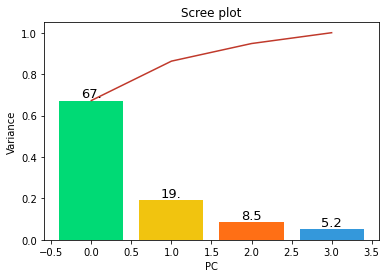

In [77]:
# 주성분 갯수를 4으로 했을 때 scree plot
pca = PCA(4)
project = pd.DataFrame(pca.fit_transform(numerical_scaled), columns=['PC1','PC2','PC3','PC4'])
scree_plot(pca)

In [78]:
pca = PCA()
X_p = pca.fit_transform(numerical_scaled)

print(pd.Series(np.cumsum(pca.explained_variance_ratio_)))

0    0.672578
1    0.862701
2    0.947759
3    1.000000
dtype: float64


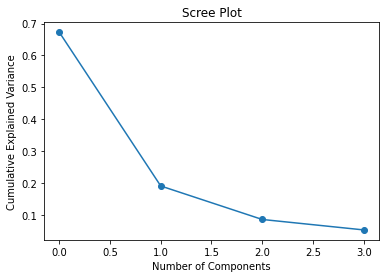

In [79]:
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_,'o-')

In [80]:
# scree plot과 위의 결과를 통해 80%이상의 설명하면서 차원을 축소하기 위해 2차원으로 축소
pca = PCA(2)
project2 = pd.DataFrame(pca.fit_transform(numerical_scaled), columns=['PC1','PC2'])
project2

,PC1,PC2
0,-0.533115,-0.058868
1,-0.420815,-0.090041
2,-0.535250,0.002269
3,-0.533115,-0.058868
4,-0.274947,-0.180500
...,...,...
16136,-0.390040,-0.101299
16137,-0.552883,-0.056711
16138,0.321884,-0.344309
16139,-0.088889,0.587329


In [81]:
project2 = pd.concat([project2,Genre_Platform], axis=1)
project2

,PC1,PC2,Genre,Platform
0,-0.533115,-0.058868,Action,DS
1,-0.420815,-0.090041,Action,Wii
2,-0.535250,0.002269,Adventure,PSP
3,-0.533115,-0.058868,Misc,DS
4,-0.274947,-0.180500,Platform,PS3
...,...,...,...,...
16136,-0.390040,-0.101299,Platform,GC
16137,-0.552883,-0.056711,Action,PSP
16138,0.321884,-0.344309,Sports,PS3
16139,-0.088889,0.587329,Action,PSV


- PCA 후 scatter plot (Genre에 대해서)

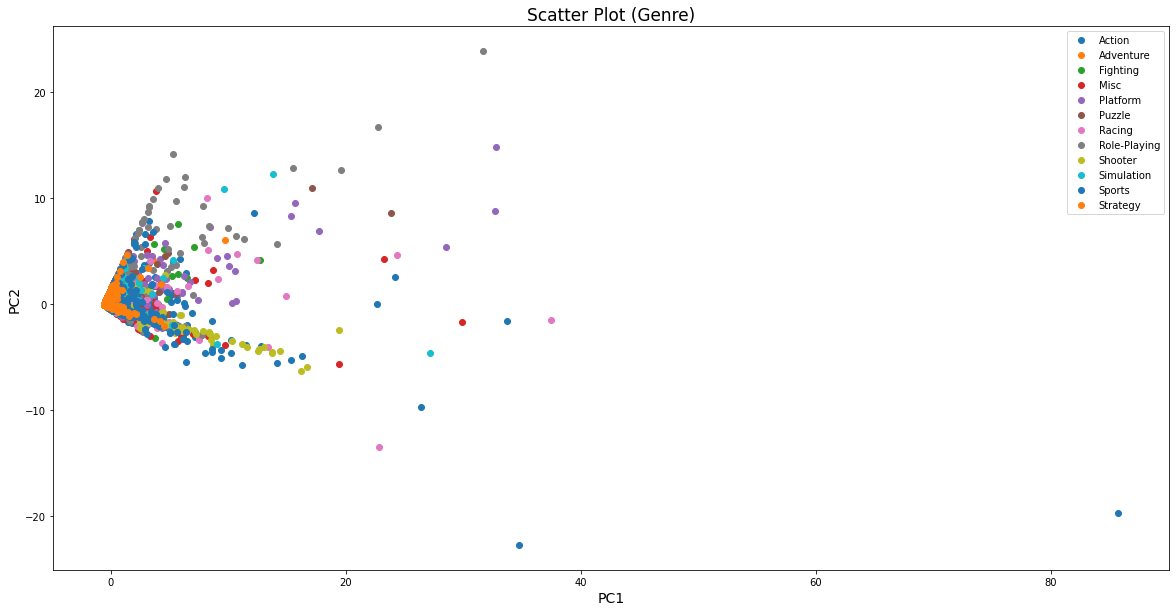

In [82]:
groups = project2.groupby('Genre')


plt.figure(figsize=(20,10))
for name, group in groups:
    plt.plot(group.PC1, group.PC2,
    marker='o',
    linestyle='',
    label=name)
plt.legend()
plt.title('Scatter Plot (Genre)', fontsize=17)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.show()

- PCA 후 scatter plot (Platform에 대해서)

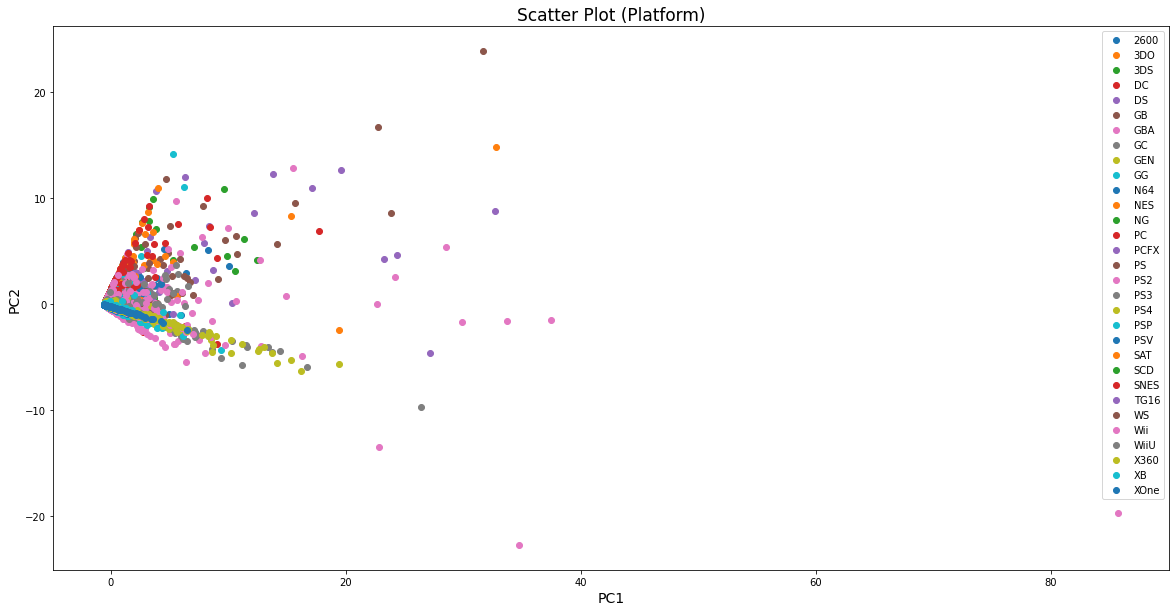

In [83]:
groups = project2.groupby('Platform')


plt.figure(figsize=(20,10))
for name, group in groups:
    plt.plot(group.PC1, group.PC2,
    marker='o',
    linestyle='',
    label=name)
plt.legend()
plt.title('Scatter Plot (Platform)', fontsize=17)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.show()

### 3. 가장 높은 출고량 500개 데이터 Clustering

In [84]:
df6 = vgames.copy()

df6['Total_Sales'] = df6.NA_Sales + df6.EU_Sales + df6.JP_Sales + df6.Other_Sales
df6.loc[:, 'NA_Sales':'Total_Sales'] = df6.loc[:, 'NA_Sales':'Total_Sales'].round(3)

In [85]:
df6 = df6.sort_values('Total_Sales', ascending=False)
top500 = df6.head(500)
top500.reset_index(drop=True, inplace=True)

In [86]:
top500_feature = top500.loc[:,'NA_Sales':'Other_Sales']

Standard_scale = StandardScaler()
top500_scaled = pd.DataFrame(Standard_scale.fit_transform(top500_feature), columns=top500_feature.columns)

pca = PCA()
X_p = pca.fit_transform(top500_scaled)

print(pd.Series(np.cumsum(pca.explained_variance_ratio_)))

0    0.584629
1    0.810106
2    0.922939
3    1.000000
dtype: float64


In [87]:
# scree plot과 위의 결과를 통해 80%이상의 설명하면서 차원을 축소하기 위해 2차원으로 축소
pca = PCA(2)
project3 = pd.DataFrame(pca.fit_transform(top500_scaled), columns=['PC1','PC2'])
project3

,PC1,PC2
0,19.278457,3.822986
1,6.407227,-4.150924
2,7.564667,0.121880
3,6.682336,0.138085
4,6.047047,-5.691641
...,...,...
495,-0.924125,0.250810
496,-0.984204,0.153727
497,-1.017990,0.174142
498,-0.904603,0.213268


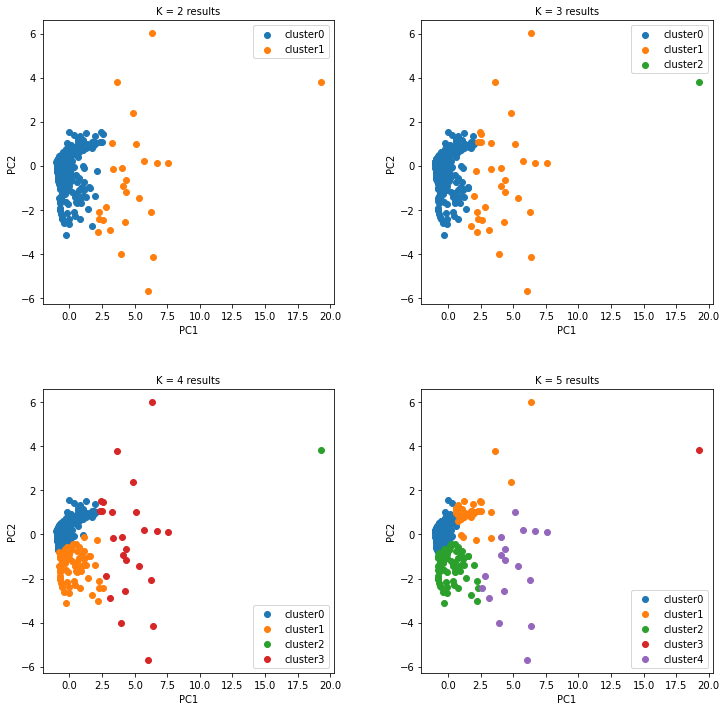

In [88]:
f, axes = plt.subplots(2,2)
f.set_size_inches((12,12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)



for k in range(2,6):
    points2 = project3.copy()
    model = KMeans(n_clusters=k, random_state=22)
    model.fit(points2)
    points2['cluster'] = model.fit_predict(points2)

    for i in range(k):
        if k==2:
            axes[0,0].scatter(points2.loc[points2['cluster']==i, 'PC1'], points2.loc[points2['cluster']==i, 'PC2'], label='cluster'+str(i))
            axes[0,0].legend()
            axes[0,0].set_title('K = %d results' %k, size=10)
            axes[0,0].set_xlabel('PC1')
            axes[0,0].set_ylabel('PC2')

        elif k==3:
            axes[0,1].scatter(points2.loc[points2['cluster']==i, 'PC1'], points2.loc[points2['cluster']==i, 'PC2'], label='cluster'+str(i))
            axes[0,1].legend()
            axes[0,1].set_title('K = %d results' %k, size=10)
            axes[0,1].set_xlabel('PC1')
            axes[0,1].set_ylabel('PC2')
            
        elif k==4:
            axes[1,0].scatter(points2.loc[points2['cluster']==i, 'PC1'], points2.loc[points2['cluster']==i, 'PC2'], label='cluster'+str(i))
            axes[1,0].legend()
            axes[1,0].set_title('K = %d results' %k, size=10)
            axes[1,0].set_xlabel('PC1')
            axes[1,0].set_ylabel('PC2')

        elif k==5:
            axes[1,1].scatter(points2.loc[points2['cluster']==i, 'PC1'], points2.loc[points2['cluster']==i, 'PC2'], label='cluster'+str(i))
            axes[1,1].legend()
            axes[1,1].set_title('K = %d results' %k, size=10)
            axes[1,1].set_xlabel('PC1')
            axes[1,1].set_ylabel('PC2')


    
    
